# Comparing PR Handling in FOSS Commununities

In this notebook we study how different Free & Open-Source Software (FOSS) communities handle Pull Requests (PRs). In particular, we compare how _protective_, _equitable_ and _lenient_ FOSS communities are in handling PRs. [NOTE: Maybe here some examples of what each of these categories mean at a high level]. 

To this end, we have collected information related to PR handling from members of the following FOSS communities [NOTE: reference to the study]:

* FOSSASIA
* Odoo
* DuckDuckGo
* Linux Kernel
* Coala
* ROS
* Plone
* ReactJS
* AngularJS
* NodeJS
* OpenGenus
* Mozilla
* OpenSUSE
* jQuery
* Apache
* Other


## Classification

We are interested in comparing how _protective_, _equitable_ and _lenient_ the different communities are. Below we precisely describe what the criteria to classify a community within a category.

### Protective

A community is classified as “Protective” when the response from this community is positive in at least one of these variables V28 (“I don't consider a pull request/patch, unless I trust the contributor”), V29 (“I don't consider a pull request/patch, unless the contributor is reliable.”), and V30 (“I don't consider a pull request/patch, unless I have a strong relationship with the contributor.”). It is possible that positive evaluations of V27 (“In general I  say no to most pull requests (PR)/patches”) can be included in this evaluation too.

### Equitable

A community is classified as “Equitable” when the response from this community is positive in at least one of these variables V31 (“I assess every pull request/patch in the same manner irrespective of the contributor.”), V32 (“I assess pull requests/patches purely on technical grounds.”).  The equitability in community is expected to find positive answers on V31, V32 which have different tone compared to V33 (“I never say no to a pull request/patch. If the quality of the PR/patch is not mergeable, then I mentor the contributor to elevate his/her PR/patch to a mergeable state.”) in question.

### Lenient

A community is classified as “Lenient” when the response from this community is positive V33 (“I never say no to a pull request/patch. If the quality of the PR/patch is not mergeable, then I mentor the contributor to elevate his/her PR/patch to a mergeable state.”).

### Answers 

The participants in the survey selected a mark from the likert scale below to answer each question:

1. Strongly Agree
2. Agree
3. Neutral
4. Disagree
5. Strongly Diasgree


**Remark**: In this study we consider that a community is _positive_ on a variable if the questions of the community are concentrated on strongly agree, agree or neutral. [NOTE: Perhaps here we should say why we choose this threshold]

### Summary

This table summaries the variables we study for each category. For a category $c \in \{\mathit{protective, equitable, lenient}\}$ and the set of variables for that category (denoted as $V_c$), we say that a community is $c$ iff it is positive (see remark above) to either of the questions in $V_c$. For instance, we say that a community is _lenient_ iff it is positive to either _V31_ or _V32_.


| Category   | ID   | Variable                                                                                                           |
|------------|------|--------------------------------------------------------------------------------------------------------------------|
| Protective |      |                                                                                                                    |
|            | V28  | I don't consider a pull request/patch, unless I trust the contributor.                                             |
|            | V29  | I don't consider a pull request/patch, unless the contributor is reliable.                                         |
|            | V30  | I don't consider a pull request/patch, unless I have a strong relationship with the contributor.                   |
|            | V27^ | In general I  say no to most pull requests (PR)/patches”) can be included in this evaluation too.                  |
| Equitable  |      |                                                                                                                    |
|            | V31  | I assess every pull request/patch in the same manner irrespective of the contributor.                              |
|            | V32  | I assess pull requests/patches purely on technical grounds.                                                        |
| Lenient    |      |                                                                                                                    |
|            | V33  | I never say no to a pull request/patch. I mentor the contributor to elevate his/her PR/patch to a mergeable state. |
|            |      |                                                                                                                    |

^ Variable V27 is optional in comparing protectiveness. However, it can be used to get additional information (see [Protective](#Protective) above).


---

[NOTE: Editing the table above in codelab is a pain. The editor provides no support whatsoever for editing markdown tables. My current approach is to edit the table in emacs and copy/paste it here. If you would like to edit the table, I recommend that you copy the table to a markdown editor with support for tables, make some edits, and then copy it back.]

[NOTE: The summary is written in a language that it is useful for me. But my immediate guess is that the TSE community will not appreciate this formulation. So I leave it to you guys to present it in a more TSE friendly manner. Nevertheless, I find the table clarifying.]

## Hypotheses

In what follows we analyze the veracity of the following hypotheses:

**H1:** The Linux Kernel community adopts a protective style of governance for its code change process.

**H2:** The FOSSASIA community adopts an equitable style of governance for its pull request process.

**H3:** The Odoo community adopts an equitable style of governance for its pull request process.

**H4:** The DuckDuckGo community adopts a linient style of governance for its pull request process.

**H5:** The Coala community adopts a linient style of governance for its pull request process.

**H6:** Each FOSS community adopts a governance style, either protective, equitable or linient, for its pull request process.

## Bayesian Data Analysis and Hypothesis Testing

In order to test the hypoteses above (see [Hypotehses](#Hypoteses)), we use Bayesian inference to estimate the underlying distributions of the answers that each FOSS community gives to each of the variables defined above.

We assume that the answers to the questions are [normaly distributed](https://en.wikipedia.org/wiki/Normal_distribution) over the possible answers (see [answers](#Answers)). Hence, we use a Bayesian model with normal distribution as a likelihood function---i.e., the distribution of the data in Bayesian jargon. We set a very uninformation and flexible prior so that we let the inference engine obtain the underlying distribuion of the answers for each community.

Once we have obtained the distributions for each variable of each community we use different techniques to test our hypotheses. These techniques will be discussed in detailed below.

We use PyMC3 to perform our analyses.

In what follows, we first load the data and inialize the libraries used for the analysis, and, later, we present a section per hypothesis describing the model and the code to test the veracity of the hypothesis.

###  Initialization

**Little technical note:** In case you have problems with arviz+pymc3. Just run the cell below.

You will be abel to detect issues if running the imports cell (two cells below) gives you an error.

In [0]:
!pip install arviz
!pip install git+https://github.com/pymc-devs/pymc3

#### Imports

Here we simply import all the libraries we need for our analysis.

[NOTE: If you think it is necessary I can explain what each library is for]

In [0]:
import numpy as np
import pandas as pd
import arviz as az
import pymc3 as pm
from matplotlib import pyplot as plt

### Loading the data

We read the data from the pseudonymized data set and filter it by
community. The dataset contains the answers of each participants to questions (variables) from V27 to V33. Each cell in the dataset contains an integer value in $\{-1\} \cup [1,5]$ where $-1$ means that the participant didn't answer the question, $1$ means strongly agree, $2$ agree, and so on.

In order to protect the identity of the participants we have striped out identifiable information from the original dataset. Concretely, unique identfiers and textual answers. This modification has no effect in the results as those data are irrelevant.

Run the cell below to get a preview of the dataset.

In [9]:
df = pd.read_csv('pseudonymized-data.csv')

### In case the file 'pseudonymized-data.csv' disappears, comment the line above, and use the code below to upload it again
# from google.colab import files
# import io
# uploaded = files.upload()
# df = pd.read_csv(io.BytesIO(uploaded['pseudonymized-data.csv']))

df

,Community,V27,V28,V29,V30,V31,V32,V33
0,Comm.FOSSASIA,4,4,4,5,1,1,1
1,Comm.FOSSASIA,5,5,5,5,1,1,1
2,Comm.FOSSASIA,-1,-1,-1,-1,-1,-1,-1
3,Comm.FOSSASIA,-1,-1,-1,-1,-1,-1,-1
4,Comm.FOSSASIA,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...
382,Comm.OpenSUSE,3,5,5,5,2,1,4
383,Comm.ROS,5,5,5,5,2,2,3
384,Comm.Plone,4,5,5,4,4,4,3
385,Comm.Linux_Kernel,-1,-1,-1,-1,-1,-1,-1


### H1
#### The Linux Kernel community adopts a protective style of governance for its code change process.

#### Data

Here we simply print the data we will analyze, i.e., answers to question V33 by the Coala community.

In [33]:
## Just showing that all answer to V33 by duckduck go are -1
Community = 'Comm.Linux_Kernel'
v27 = df[(df.Community == Community) & (df.V27 != -1)].V27
v28 = df[(df.Community == Community) & (df.V28 != -1)].V28
v29 = df[(df.Community == Community) & (df.V29 != -1)].V29
v30 = df[(df.Community == Community) & (df.V30 != -1)].V30
v28

277    5
292    2
296    3
303    1
306    1
308    4
310    4
311    1
313    1
315    4
317    2
330    1
332    2
335    1
340    5
342    3
350    4
352    4
354    5
Name: V28, dtype: int64

#### Model

To study this hypothesis, we estimate the distribution of the answers
to questions V27-V30 by participants of the Linux Kernel community. As mentioned earlier, we assume that the data form a [normal
distribution](https://en.wikipedia.org/wiki/Normal_distribution). We estimate the distribution for the answers to each question separately. We
set
[uniform](https://en.wikipedia.org/wiki/Uniform_distribution_(continuous))
priors on the parameters of the normal distributions—from
$1$ to $5$ for the mean, and $0$ to $10$ for the standard
deviation. Finally we check whether the answers are positive to any of the questions above. That is, whether the participants reply in the range neutral, agree or strongly agree.


In [0]:
with pm.Model() as protective_linux_kernel:
  μ27 = pm.Uniform('μ27', lower=1, upper=5)
  μ28 = pm.Uniform('μ28', lower=1, upper=5)
  μ29 = pm.Uniform('μ29', lower=1, upper=5)
  μ30 = pm.Uniform('μ30', lower=1, upper=5)

  σ27 = pm.Uniform('σ27', lower=0, upper=4)
  σ28 = pm.Uniform('σ28', lower=0, upper=4)
  σ29 = pm.Uniform('σ29', lower=0, upper=4)
  σ30 = pm.Uniform('σ30', lower=0, upper=4)

  obs27 = pm.Normal('obs27',mu=μ27,sigma=σ27,observed=v27)
  obs28 = pm.Normal('obs28',mu=μ28,sigma=σ28,observed=v28)
  obs29 = pm.Normal('obs29',mu=μ29,sigma=σ29,observed=v29)
  obs30 = pm.Normal('obs30',mu=μ30,sigma=σ30,observed=v30)

#### Sampling

In [22]:
with protective_linux_kernel:
  trace_protective_linux_kernel = pm.sample(10000,cores=2)
  ppc_protective_linux_kernel = pm.sample_posterior_predictive(trace_protective_linux_kernel, 
                                                               samples=5000, 
                                                               model=protective_linux_kernel)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ30, σ29, σ28, σ27, μ30, μ29, μ28, μ27]


Sampling 2 chains for 500 tune and 10_000 draw iterations (1_000 + 20_000 draws total) took 32 seconds.
/usr/local/lib/python3.6/dist-packages/pymc3/sampling.py:1581: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


#### Plotting

/usr/local/lib/python3.6/dist-packages/arviz/data/base.py:146: UserWarning: More chains (5000) than draws (19). Passed array should have shape (chains, draws, *shape)
  UserWarning,
/usr/local/lib/python3.6/dist-packages/arviz/data/base.py:146: UserWarning: More chains (5000) than draws (19). Passed array should have shape (chains, draws, *shape)
  UserWarning,
/usr/local/lib/python3.6/dist-packages/arviz/data/base.py:146: UserWarning: More chains (5000) than draws (19). Passed array should have shape (chains, draws, *shape)
  UserWarning,
/usr/local/lib/python3.6/dist-packages/arviz/data/base.py:146: UserWarning: More chains (5000) than draws (19). Passed array should have shape (chains, draws, *shape)
  UserWarning,


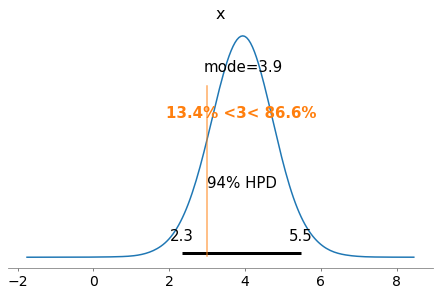

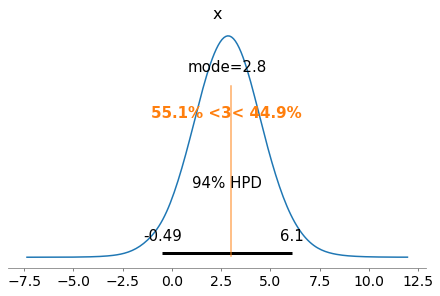

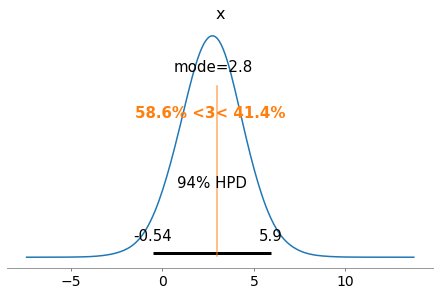

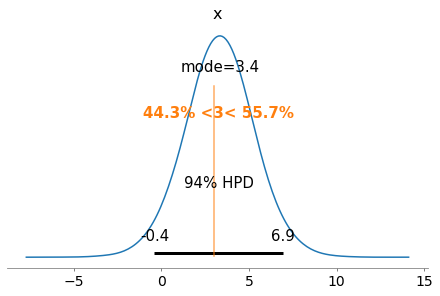

In [28]:
pm.plot_posterior(ppc_protective_linux_kernel['obs27'],ref_val=3,point_estimate='mode')
pm.plot_posterior(ppc_protective_linux_kernel['obs28'],ref_val=3,point_estimate='mode')
pm.plot_posterior(ppc_protective_linux_kernel['obs29'],ref_val=3,point_estimate='mode')
pm.plot_posterior(ppc_protective_linux_kernel['obs30'],ref_val=3,point_estimate='mode')
plt.show()

#### Queries

##### Protective

We define a function that precisely defines whether the answers to a question are _positive_ based on its probability distribution. 

Note that for each question we consider the distribution of the answer as positive if the distribution has 95% of the asnwers below 3.0. Intuitively, it means that all the answers are concentrated in strong agree, agree or neutral.

In [0]:
def protective(trace):
    return (np.mean(trace['obs28'] < 3.0) > .95 or
            np.mean(trace['obs29'] < 3.0) > .95 or
            np.mean(trace['obs30'] < 3.0) > .95)

Now we ask whether the Linux Kernel community is protective.

In [26]:
print("Is the " + Community + " community protective? " + str(protective(ppc_protective_linux_kernel)))

Is the Comm.Linux_Kernel community protective? False


#### Conclusions

As the output of the cell above suggest, the Linux Kernel communitive is not protective. Therefore we can conclude that **hypothesis 1 is false**.

The HPD intervals show that the answers are heavily spread out all possibilities, i.e., all values from 1 to 5 are within the HPD interval. This observation indicates that the community does not show a central tendency in the how protective they are.

### H4
#### "The DuckDuckGo community adopts a linient style of governance for its pull request process."


#### Data

Here we simply print the data we will analyze, i.e., answers to question V33 by the Coala community.

In [5]:
## Just showing that all answer to V33 by duckduck go are -1
df[(df.Community == 'Comm.DuckDuckGo')].V33

125   -1
128   -1
129   -1
329   -1
Name: V33, dtype: int64

#### Model

To study this hypothesis, we estimate the distribution of the answers
to question V33 by participants of the DuckDuckGo community. As mentioned earlier, we assume that the data form a [normal
distribution](https://en.wikipedia.org/wiki/Normal_distribution). We
set
[uniform](https://en.wikipedia.org/wiki/Uniform_distribution_(continuous))
priors on the parameters of the normal distributions for the data—from
$1$ to $5$ for the mean, and $0$ to $10$ for the standard
deviation. Finally we compute the difference between the means and
standard deviations to evaluate our hypothesis.


In [0]:
with pm.Model() as duckduckgo_lenient:
    μ = pm.Uniform('μ', 1, 5)
    σ = pm.Uniform('σ', 0, 10)

    obs = pm.Normal('obs', mu=μ, sigma=σ,
                    observed=df[(df.Community == 'Comm.DuckDuckGo') & (df.V33 != -1)].V33)

#### Sampling

In [0]:
with duckduckgo_lenient:
    trace = pm.sample(10000,cores=2)

#### Plotting

In [0]:
pm.traceplot(trace)
plt.show()

#### Conclusions

Since nobody from the DuckDuckGo community reply to answer V33 we cannot perform the analysis.

### H5
#### "The Coala community adopts a linient style of governance for its pull request process."


#### Data

Here we simply print the data we will analyze, i.e., answers to question V33 by the Coala community.

In [0]:
df[(df.Community == 'Comm.Coala') & (df.V33 != -1)].V33

23     2
57     1
62     2
72     2
86     1
144    2
231    2
Name: V33, dtype: int64

#### Model

To study this hypothesis, we estimate the distribution of the answers
to question V33 by participants of the Coala community. As mentioned earlier, we assume that the data form a [normal
distribution](https://en.wikipedia.org/wiki/Normal_distribution). We
set
[uniform](https://en.wikipedia.org/wiki/Uniform_distribution_(continuous))
priors on the parameters of the normal distributions for the data—from
$1$ to $5$ for the mean, and $0$ to $10$ for the standard
deviation. Finally we look into the posterior distribution to determine whether the hypothesis is validated by the data.


In [0]:
with pm.Model() as coala_lenient:
    μ = pm.Uniform('μ', 1, 5)
    σ = pm.Uniform('σ', 0, 10)

    obs = pm.Normal('obs', mu=μ, sigma=σ,
                    observed=df[(df.Community == 'Comm.Coala') & (df.V33 != -1)].V33)

#### Sampling

In [0]:
with coala_lenient:
  trace_coala_lenient = pm.sample(10000,cores=2) # Compute posterior
  ppc_coala_lenient = pm.sample_posterior_predictive(trace_coala_lenient, 
                                                     samples=5000,
                                                     model=coala_lenient) # Computer predictive check

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, μ]


Sampling 2 chains for 500 tune and 10_000 draw iterations (1_000 + 20_000 draws total) took 19 seconds.
The acceptance probability does not match the target. It is 0.9048611550306754, but should be close to 0.8. Try to increase the number of tuning steps.
/usr/local/lib/python3.6/dist-packages/pymc3/sampling.py:1575: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


#### Plotting

/usr/local/lib/python3.6/dist-packages/arviz/data/base.py:146: UserWarning: More chains (5000) than draws (7). Passed array should have shape (chains, draws, *shape)
  UserWarning,


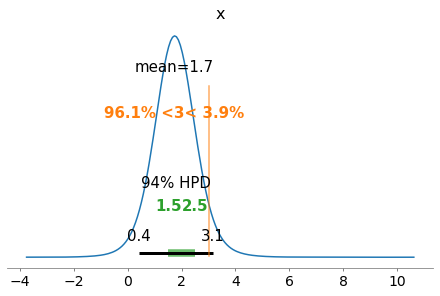

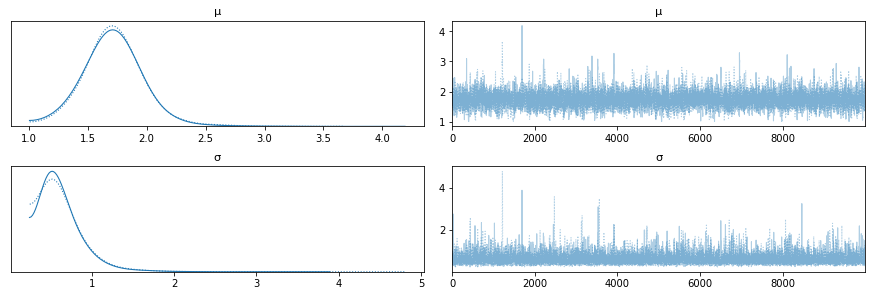

In [0]:
pm.plot_posterior(ppc_coala_lenient['obs'], ref_val=3, rope=(1.5,2.5))
pm.traceplot(trace_coala_lenient)
plt.show()

#### Conclusions

The HDP of the distribution is from 0.4 to 3.1, i.e., most answers go from strongly agree to neutral. Only 3.9% of the answers are greater than 3, i.e., only 3.9% of the answer are on the side of disagree of strongly disagree. Therefore we can conclude that **hypothesis H5 is true**.

In [0]:
with pm.Model() as model:
    μ1 = pm.Uniform('μ1', 1, 5)
    σ1 = pm.Uniform('σ1', 0, 10)

    obs1 = pm.Normal('obs1', mu=μ1, sigma=σ1, observed=df[(df.Community == 'Comm.ROS') & (df.V33 != -1)].V33)

    μ2 = pm.Uniform('μ2', 1, 5)
    σ2 = pm.Uniform('σ2', 0, 10)

    obs2 = pm.Normal('obs2', mu=μ2, sigma=σ2, observed=df[(df.Community == 'Comm.Linux_Kernel') & (df.V33 != -1)].V33)

    μ_diff = pm.Deterministic('μ_diff',μ1-μ2)
    σ_diff = pm.Deterministic('σ_diff',σ1-σ2) 

In [0]:
pm.stats.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
μ1,2.917,0.185,2.582,3.281,0.001,0.001,23430.0,23155.0,23697.0,14218.0,1.0
σ1,0.878,0.143,0.628,1.138,0.001,0.001,19494.0,17665.0,21971.0,14609.0,1.0
μ2,2.890,0.233,2.454,3.331,0.002,0.001,21423.0,21423.0,21817.0,14414.0,1.0
σ2,0.974,0.187,0.667,1.330,0.002,0.001,15344.0,14331.0,16807.0,13038.0,1.0
μ_diff,0.027,0.299,-0.542,0.578,0.002,0.002,22318.0,10291.0,22401.0,14891.0,1.0
σ_diff,-0.096,0.233,-0.549,0.337,0.002,0.001,16954.0,12224.0,17490.0,13461.0,1.0


### Determining whether the Linux Kernel community is more protective than others

We code below is still in progress...

### H4
#### "The DuckDuckGo community adopts a linient style of governance for its pull request process."


In [0]:
## Protective Coala?
### If answers are negative to V28-V30 does it mean that the community
### is not protective?

##### NOTE: Positive is > agree (also after neutral)

Community = 'Comm.ROS'
v28 = df[(df.Community == Community) & (df.V28 != -1)].V28
v29 = df[(df.Community == Community) & (df.V29 != -1)].V29
v30 = df[(df.Community == Community) & (df.V30 != -1)].V30
v31 = df[(df.Community == Community) & (df.V31 != -1)].V31
v32 = df[(df.Community == Community) & (df.V32 != -1)].V32

with pm.Model() as model:
    μ28 = pm.Uniform('μ28', lower=1, upper=5)
    μ29 = pm.Uniform('μ29', lower=1, upper=5)
    μ30 = pm.Uniform('μ30', lower=1, upper=5)
    μ31 = pm.Uniform('μ31', lower=1, upper=5)
    μ32 = pm.Uniform('μ32', lower=1, upper=5)

    σ28 = pm.Uniform('σ28', lower=0, upper=4)
    σ29 = pm.Uniform('σ29', lower=0, upper=4)
    σ30 = pm.Uniform('σ30', lower=0, upper=4)
    σ31 = pm.Uniform('σ31', lower=0, upper=4)
    σ32 = pm.Uniform('σ32', lower=0, upper=4)

    obs28 = pm.Normal('obs28',mu=μ28,sigma=σ28,observed=v28)
    obs29 = pm.Normal('obs29',mu=μ29,sigma=σ29,observed=v29)
    obs30 = pm.Normal('obs30',mu=μ30,sigma=σ30,observed=v30)
    obs31 = pm.Normal('obs31',mu=μ31,sigma=σ31,observed=v31)
    obs32 = pm.Normal('obs32',mu=μ32,sigma=σ32,observed=v32)

In [0]:
with model:
    trace = pm.sample(10000,cores=2)

In [0]:
pm.traceplot(trace)

In [0]:
## TO DISCUSS: I put as a condition > .95 instead of == 1.0 because ==
## 1.0 is hard to get. Also we should adjust for noise.

def protective(trace):
    return (np.mean(trace['obs28'] < 3.0) > .95 or
            np.mean(trace['obs29'] < 3.0) > .95 or
            np.mean(trace['obs30'] < 3.0) > .95)

def equitable(trace):
    return (np.mean(trace['obs31'] < 3.0) > .95 or
            np.mean(trace['obs32'] < 3.0) > .95)

In [0]:
ppc = pm.sample_posterior_predictive(trace, samples=5000, model=model)

In [0]:
pm.plot_posterior(ppc['obs29'],ref_val=3)

In [0]:
pm.plot_posterior(trace['μ28'],ref_val=3)

In [0]:
print("The community " + Community + " is" + ("" if protective(ppc) else " not") + " protective")
print("The community " + Community + " is" + ("" if equitable(ppc) else " not") + " equitable")

In [0]:
print(np.mean(ppc['obs28']<3))
print(np.mean(ppc['obs29']<3))
print(np.mean(ppc['obs30']<3))
print(np.mean(ppc['obs31']<3))
print(np.mean(ppc['obs32']<3))